# Week 01: Intro to R

### Topics:
  1. Data using vectors
  1. Basic plotting
  1. Plotting histograms
  1. Summary statistics
  1. Reading in and analyzing data
  1. BACK TO LECTURE SLIDES FOR SUMMARY STATISTICS
  1. Tips for the HW
  1. Loading CRAN Packages and data in R

### Book-keeping

We'll discuss more about libraries later, but for now you can just run this cell to set the default sizes of plots to be a little smaller in the notebook:

In [12]:
require(repr)
options(repr.plot.width=8, repr.plot.height=6)

## 1. Data using vectors

First, we will practice using data with data from mozzerlla consumption vs civil engineering PhDs awarded from [Spurious Correlations](https://www.tylervigen.com/spurious-correlations).

Note how vectors are defined here with a c():

In [13]:
year <- c(2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009)
mozz <- c(9.3, 9.7, 9.7, 9.7, 9.9, 10.2, 10.5, 11, 10.6, 10.6)
edocs <- c(480, 501, 540, 552, 547, 622, 655, 701, 712, 708)

Note here that I can also use "=" for variable assignment.

## 2. Basic plotting using R

Let's make a quick plot of some of this data:

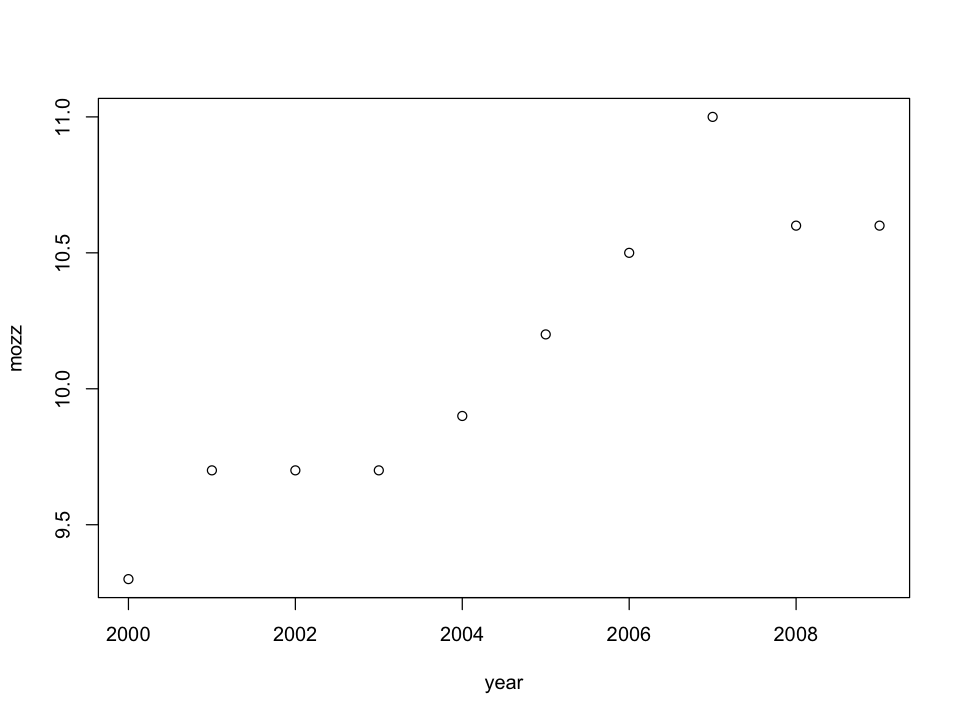

In [14]:
plot(year,mozz)

Ok, but maybe we want nice red dots like on the website:

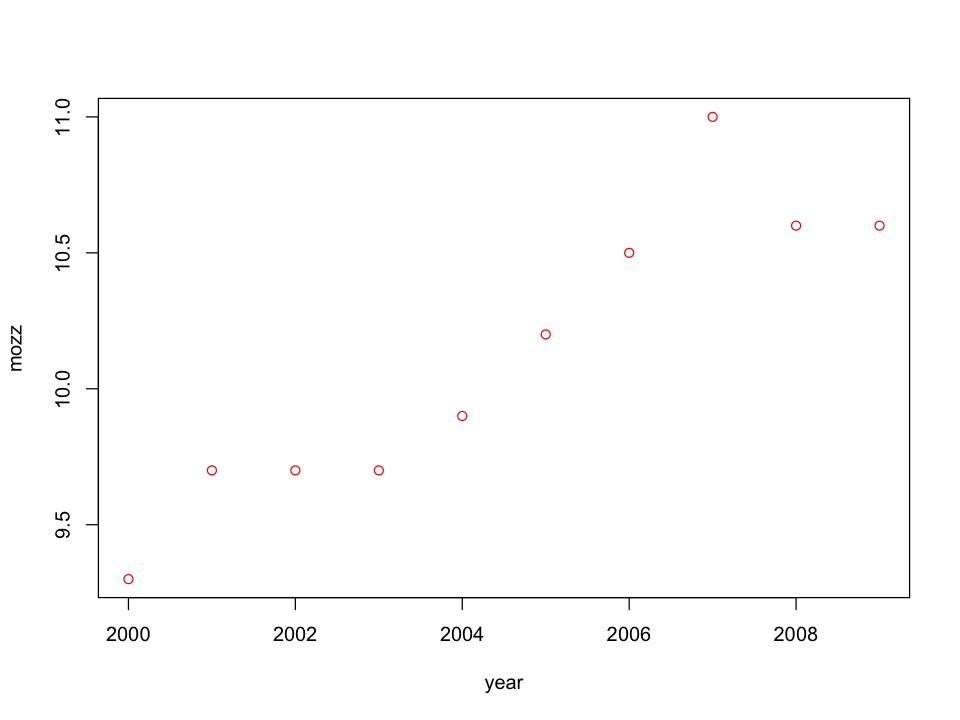

In [15]:
plot(year,mozz,col="red")

But hey, what about connecting them with lines though?

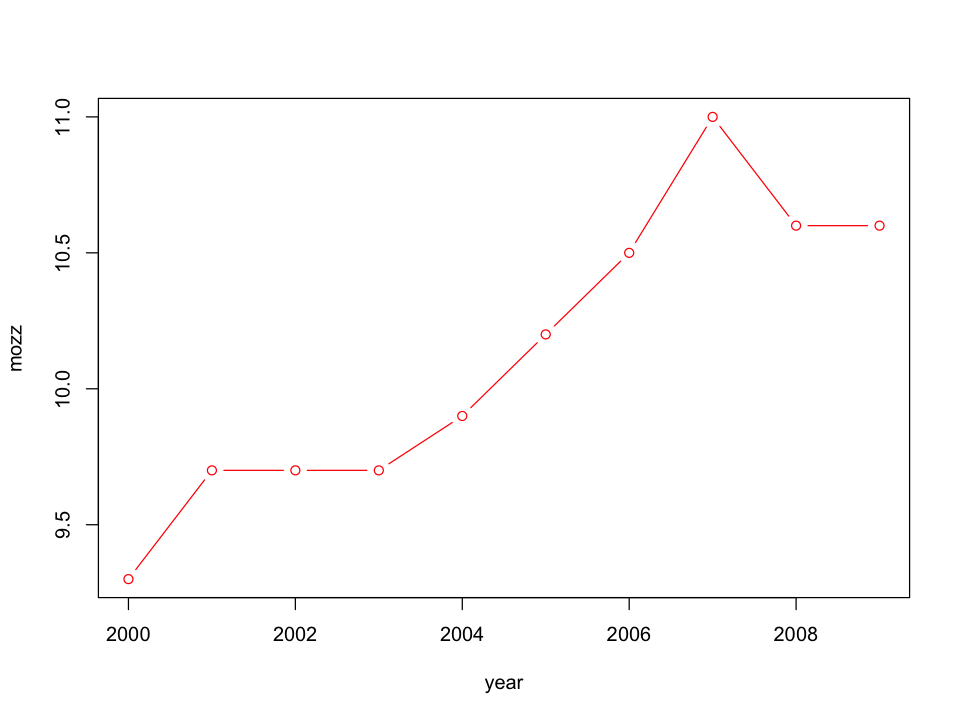

In [16]:
plot(year,mozz,col="red",type="b")

Well, the "year" label is fine, but what about "mozz" on the y axis?

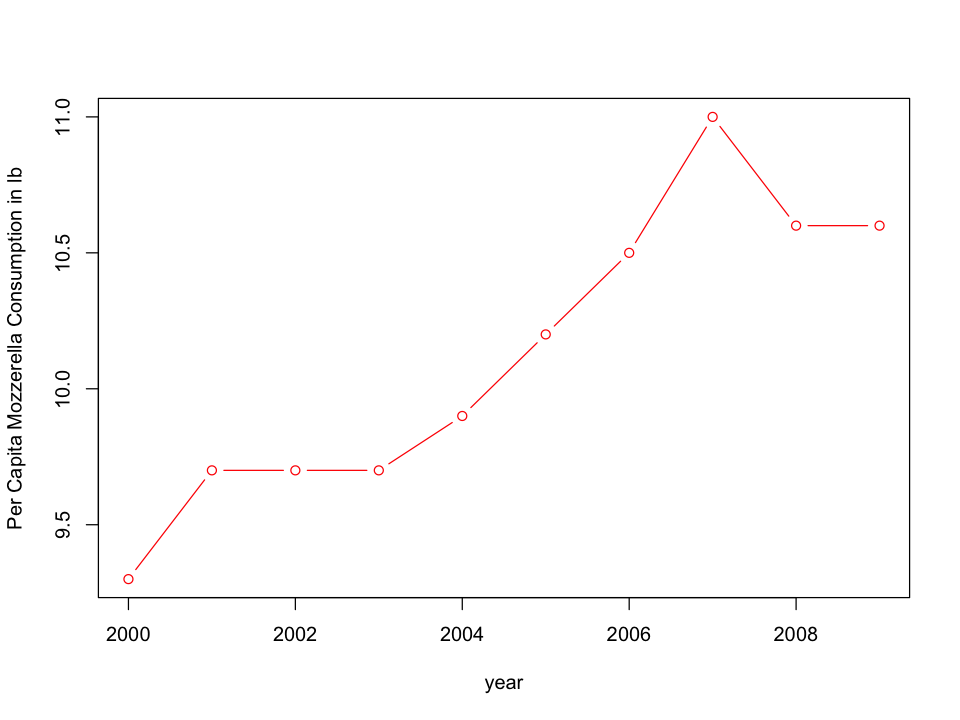

In [17]:
plot(year,mozz,col="red",type="b", ylab="Per Capita Mozzerella Consumption in lb")

Now lets plot the # of engineering docs as a function of time as well:

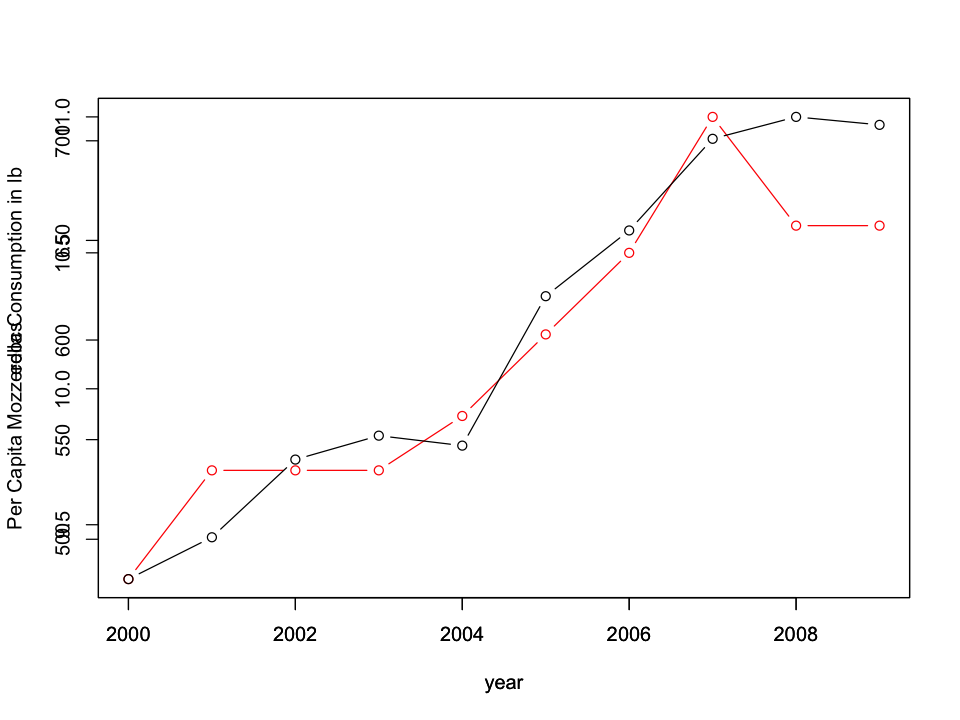

In [18]:
plot(year,mozz,col="red",type="b", ylab="Per Capita Mozzerella Consumption in lb")
par(new=TRUE) # we use this to over plot
plot(year,edocs,col="black",type="b")

But wait! the axis look horrible!  Let's try this again:

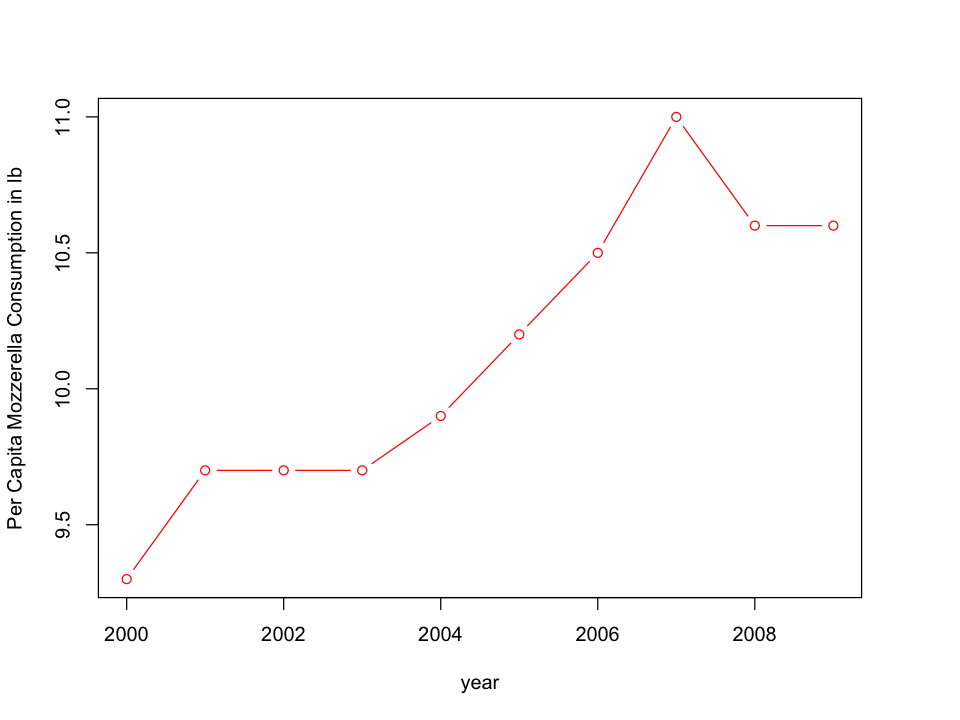

In [19]:
par(mar = c(5,4,4,4) + 0.1) # this just adds a buffer onto the right axis
plot(year,mozz,col="red",type="b", ylab="Per Capita Mozzerella Consumption in lb")

Let's change the color of the axis for Per Mozz consumption:

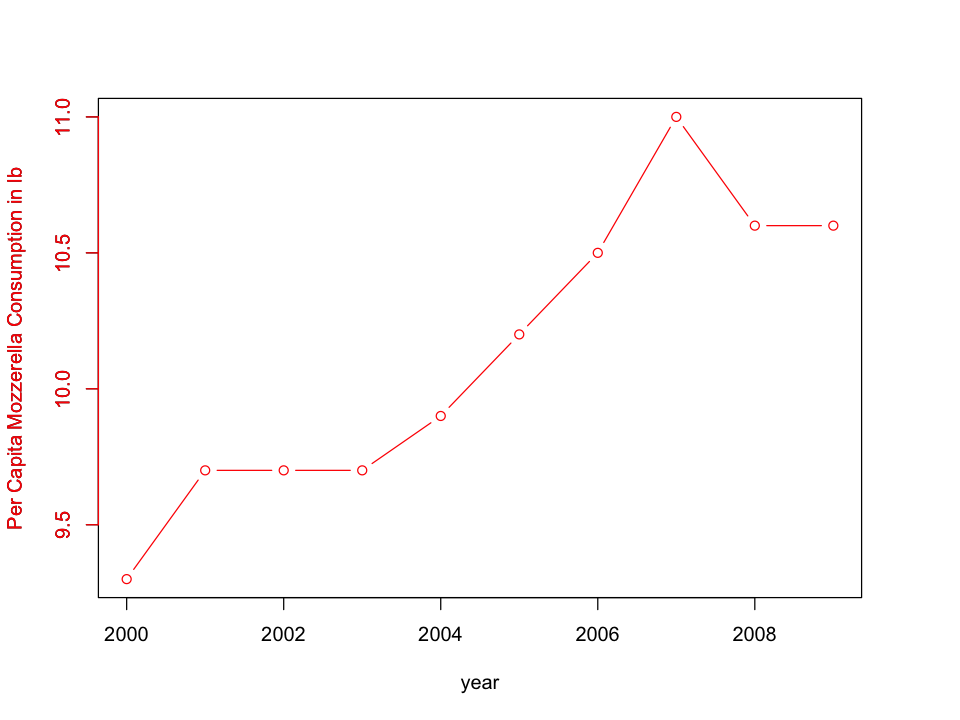

In [20]:
par(mar = c(5,4,4,4) + 0.1) # this just adds a buffer onto the right axis
plot(year,mozz,col="red",type="b", ylab="Per Capita Mozzerella Consumption in lb")

axis(2,col="red",col.ticks="red",col.axis="red",col.lab="red")
mtext("Per Capita Mozzerella Consumption in lb", side=2, line=3, col="red")

Now, let's add back in the engineering PhD data:

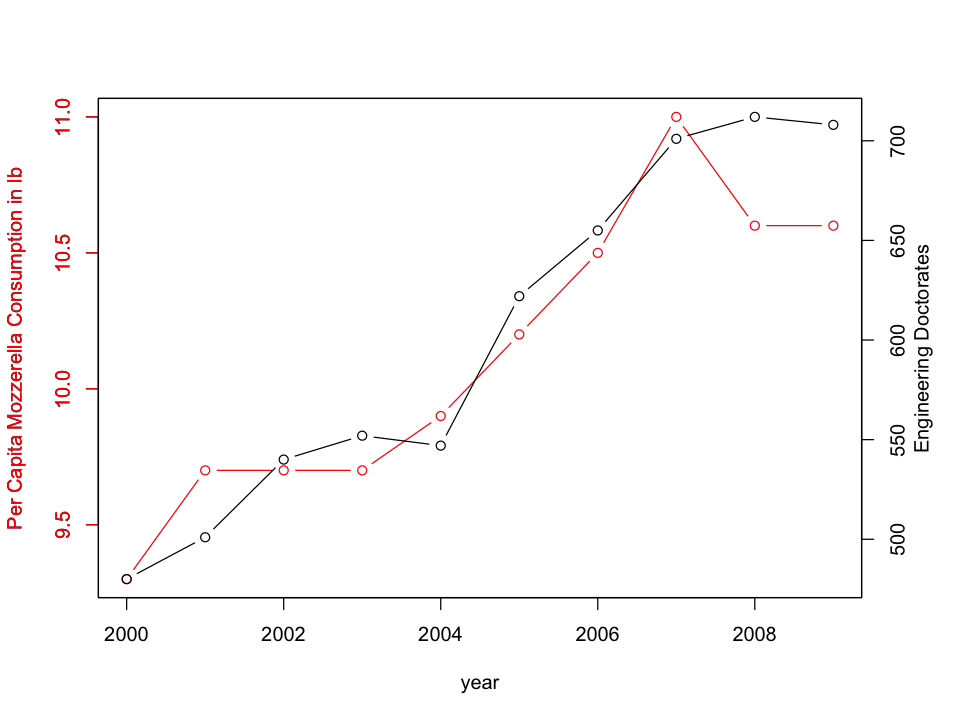

In [21]:
par(mar = c(5,4,4,4) + 0.1) # this just adds a buffer onto the right axis
plot(year,mozz,col="red",type="b", ylab="Per Capita Mozzerella Consumption in lb")

axis(2,col="red",col.ticks="red",col.axis="red",col.lab="red")
mtext("Per Capita Mozzerella Consumption in lb", side=2, line=3, col="red")

par(new=TRUE) # we use this to over plot
plot(year,edocs, type = "b", xaxt = "n", yaxt = "n", ylab = "", xlab = "")
axis(side = 4)
mtext("Engineering Doctorates", side = 4, line = 2)

Hurray!  We have a cool looking plot!

## 3. Plotting Histograms in R

Ok, lets just look at the cheese consumption data $\rightarrow$ maybe we want to know what is the overall per capita cheese consumption. We can do this with the histogram:

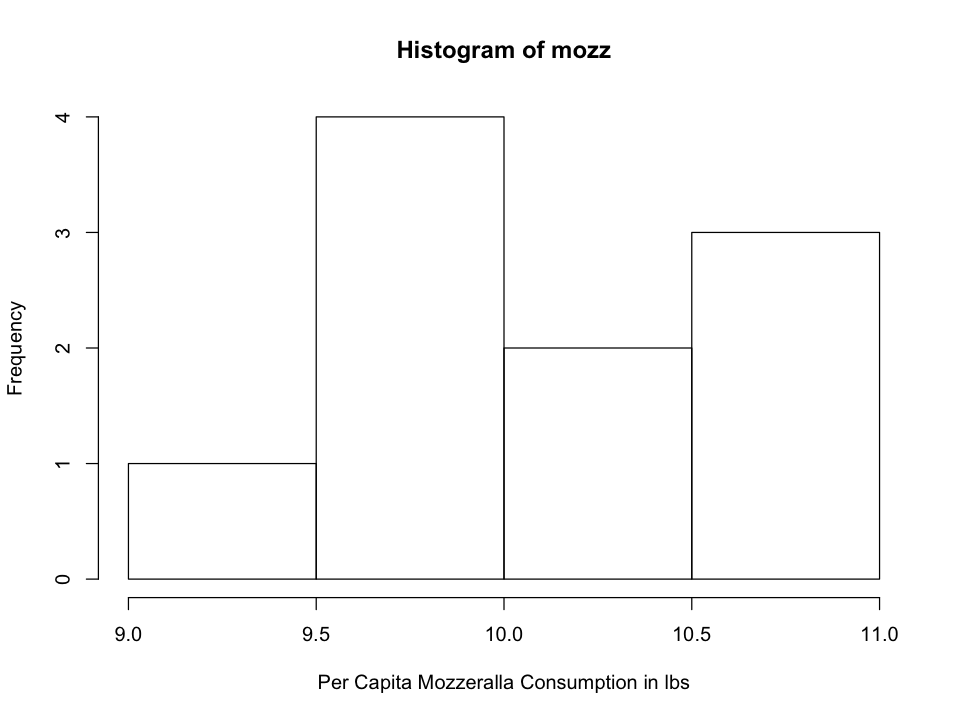

In [22]:
hist(mozz,xlab="Per Capita Mozzeralla Consumption in lbs")

Here the y-axis is showing the frequency of a certain value - how often a value shows up in our data. It looks like ~9.75 and 10.75 pounds are the most frequent values.  

Its worth noting this distribution is somewhat "bimodal" in that there are sort of 2 distinct peaks.  However, the number of measurements is very small here, so its hard to tell for sure.  This could be a "unimodal" distribution peaked around 9.75 lbs.

## 4. Summary statistics in R

We can also print out some summary statistics:

In [23]:
summary(mozz)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   9.30    9.70   10.05   10.12   10.57   11.00 

We can also calculate these things seperately:

In [24]:
mean(mozz)
median(mozz)
var(mozz) # this is the "varience" which we'll discuss in a minute
sd(mozz) # this is the standard deviation

[1] 10.12

[1] 10.05

[1] 0.2928889

[1] 0.5411921

## 5. Reading in and analyzing data

Let's try a larger dataset. In general to find data, check out data.gov or just google "statistical datasets" or there are some embedded in "R" as well, but let's try reading from a file first.

This is a file of random "tests" of before and after.  This is just a toy dataset but lets just say its a measure of resting heart rate before & after a drug trial.

In [25]:
mydata <- read.csv("l1_trialData.csv",header=TRUE,stringsAsFactors=FALSE)

Make sure this is stored somewhere you can remember!  You can put it in the same directory as this file (or whatever R-script you are working from) or you can specify a location.  For example, on my Mac I can specify the default `Downloads` folder as the location with:

```r
mydata <- read.csv("~/Downloads/l1_trialData.csv",header=TRUE,stringsAsFactors=FALSE)
```

Let's take a look at our data:

In [26]:
print(mydata)

   Before After
1      52    40
2      44    49
3      45    41
4      47    50
5      45    45
6      40    46
7      45    47
8      47    44
9      49    45
10     42    43
11     43    47
12     43    41
13     43    39
14     NA    42


Note, we can also just print out the first few rows of our dataset using `head`:

In [27]:
head(mydata, n=4)

,Before,After
,<int>,<int>
1,52,40
2,44,49
3,45,41
4,47,50


We can compare the print statement to [what is in the file](l1_trialData.csv) as well.   Notice there is an NA - this just means there is no data there.

Since its assumed folks are generally coming from an intro programming background using Python, we can first start by using R "Pythonically" and grabbing data into vectors of columns:

In [28]:
before = mydata[,1]
after = mydata[,2]

Check out the summary stats for both:

In [29]:
summary(before)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     40      43      45      45      47      52       1 

In [30]:
summary(after)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  39.00   41.25   44.50   44.21   46.75   50.00 

# BACK TO LECTURE SLIDES FOR SUMMARY STATISTICS

## 7. Tips for HW

We see that the `before` vector has an NA $\rightarrow$ this just means there is no value there. We can see this if we look at the file **go to file** there is a missing value.  The `summary` function figures this out, but if we try to use any of the summary statistics functions "on their own" we can run into trouble.  For example:

In [38]:
mean(after)

[1] 44.21429

is fine but:

In [39]:
mean(before)

[1] NA

does not work, we need to "take out" these missing entries:

In [40]:
mean(before,na.rm=TRUE)

[1] 45

Let's practice making some more histograms.

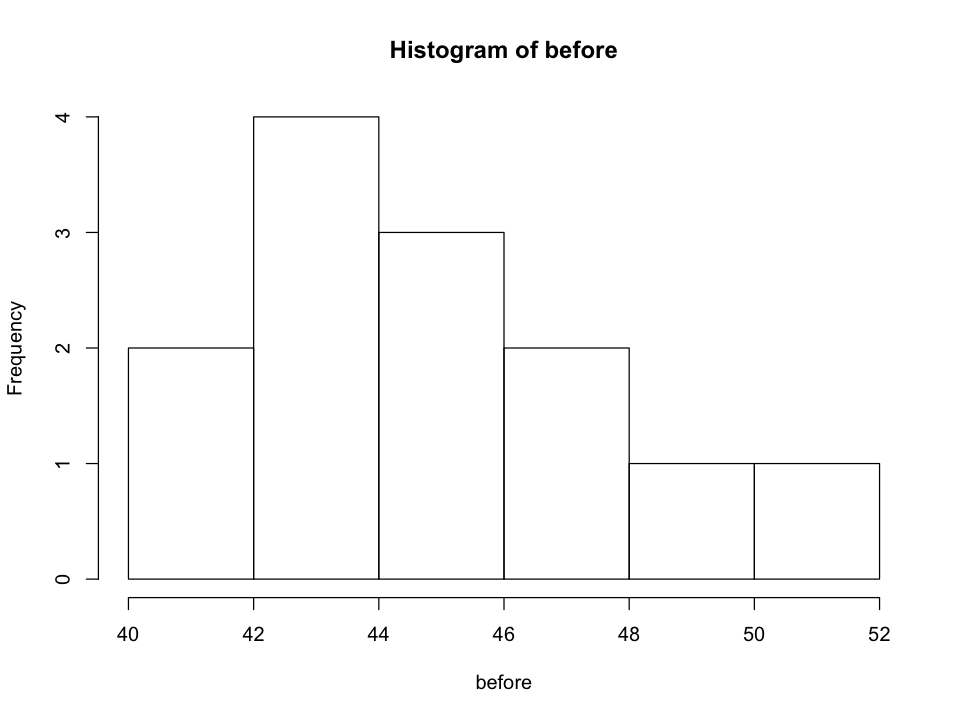

In [31]:
hist(before)

But wait, lets label it:

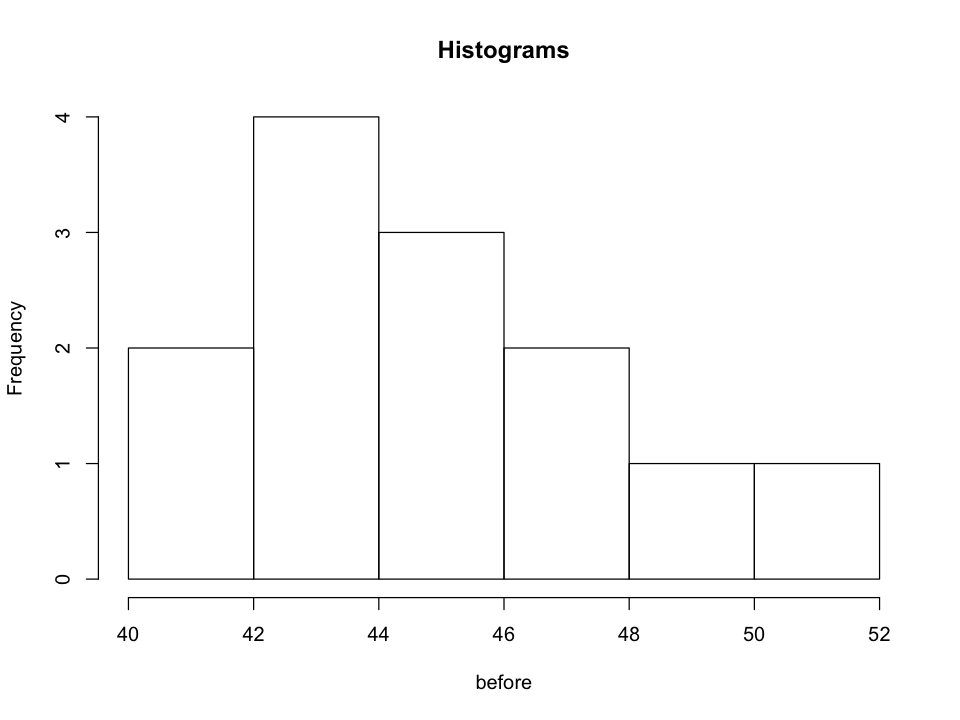

In [32]:
hist(before,main="Histograms")

Let's label x & y too:

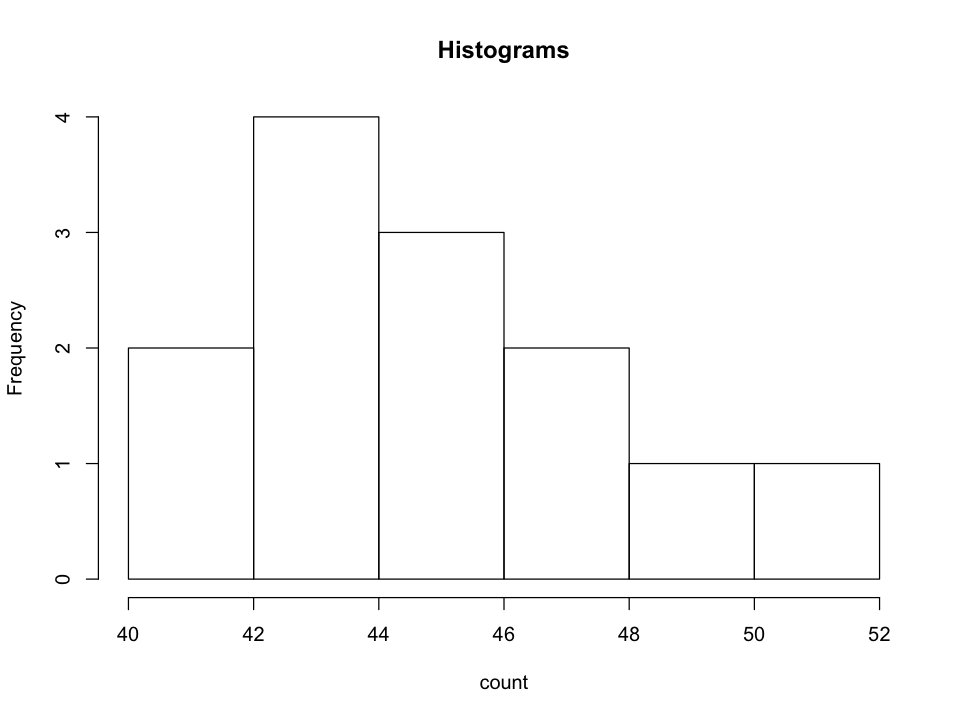

In [33]:
hist(before,main="Histograms",xlab="count")

Now let's overlay another histogram.

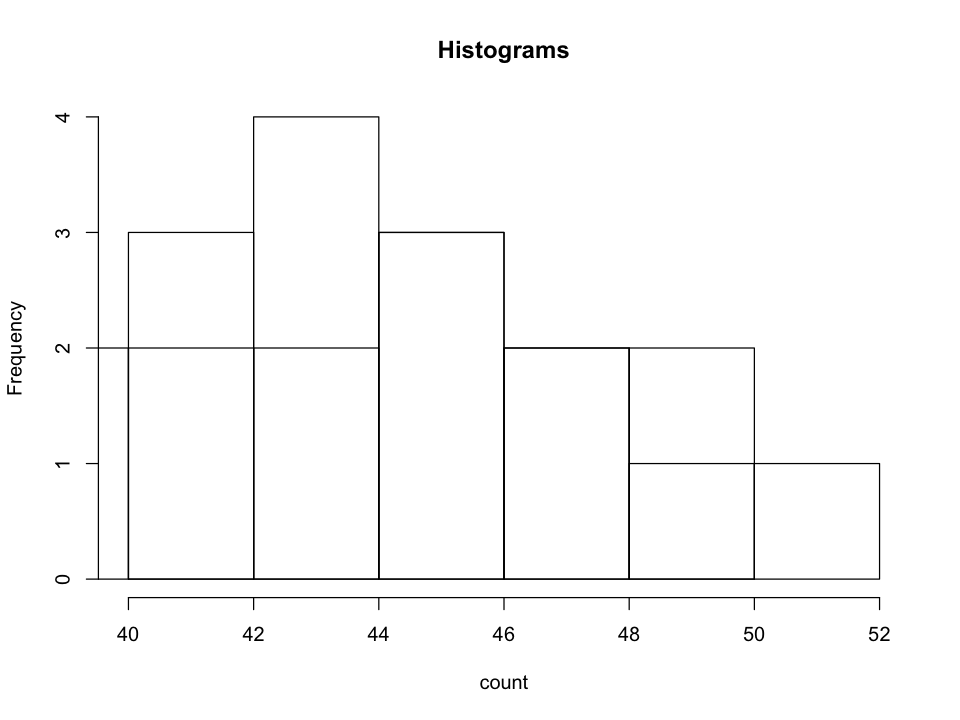

In [34]:
hist(before,main="Histograms",xlab="count")
hist(after,add=T)

But its hard to see what is going on, so let's start messing with the colors of each histogram.

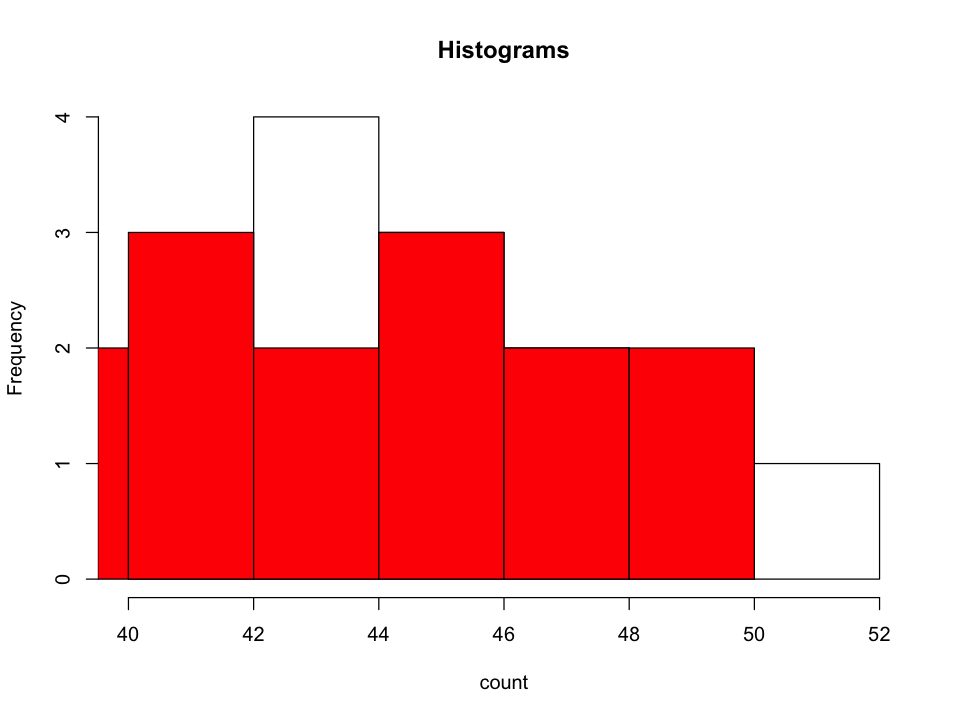

In [35]:
hist(before,main="Histograms",xlab="count")
hist(after,col=rgb(1,0,0),add=T)

Hmmm... but I feel like I want colors for both and maybe some transparency so let's try it!

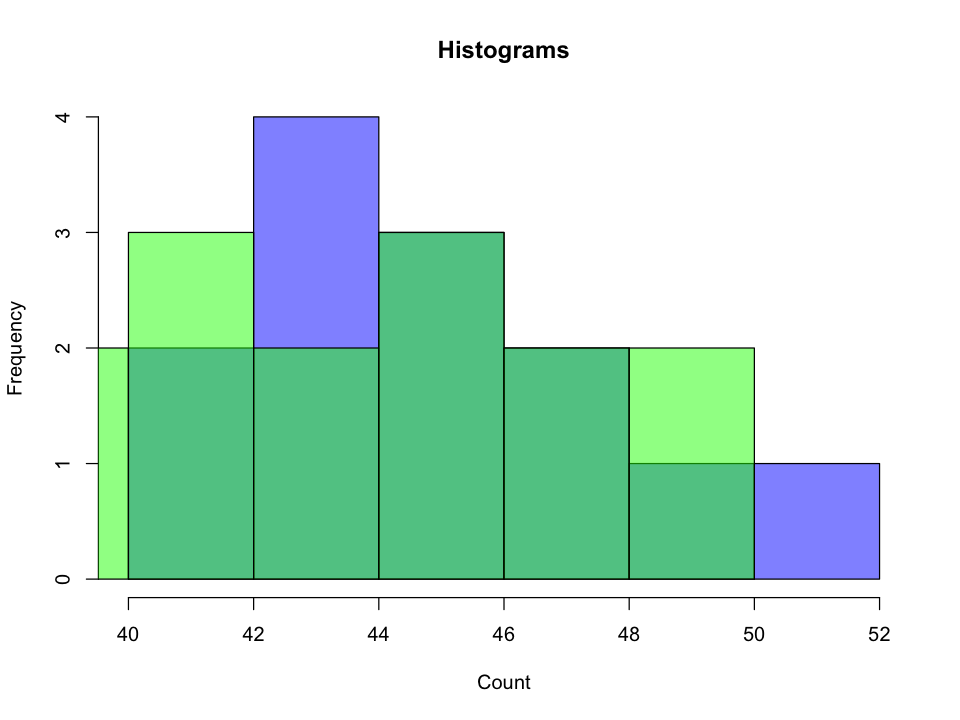

In [36]:
hist(before,main="Histograms",xlab="Count",col=rgb(0,0,1,0.5))
hist(after,col=rgb(0,1,0,0.5),add=T)

Let's also make sure we add a legend so we can tell what is what:

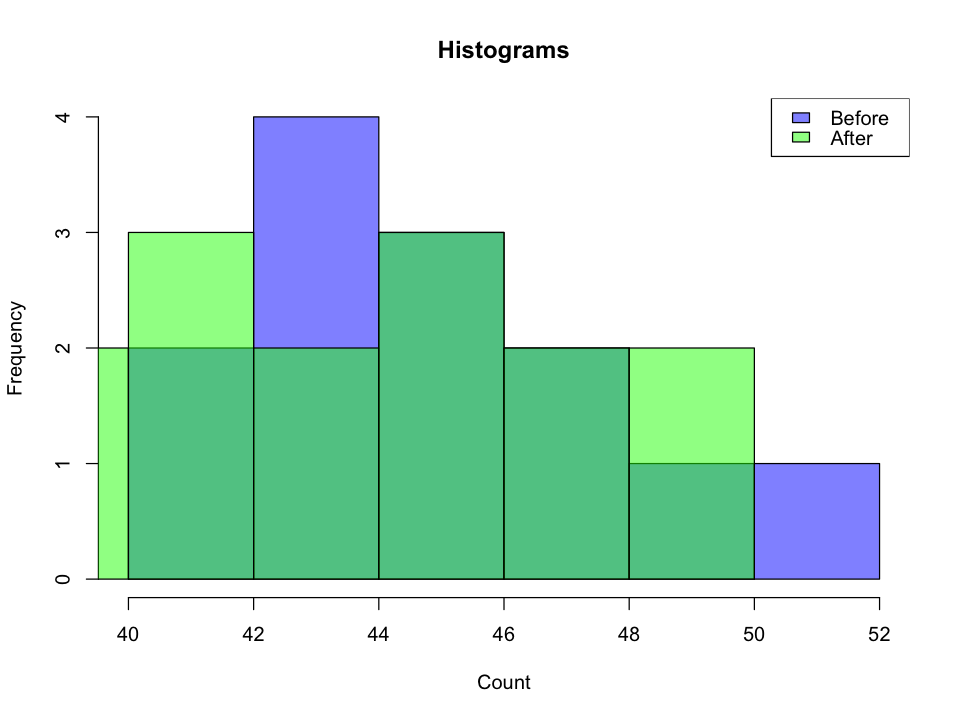

In [37]:
hist(before,main="Histograms",xlab="Count",col=rgb(0,0,1,0.5))
hist(after,col=rgb(0,1,0,0.5),add=T)
legend("topright",c("Before","After"),fill=c(rgb(0,0,1,0.5),rgb(0,1,0,0.5)))

## 8. Packages and Data

Let's look at how we can install data from R via packages.

Note: this might take a little while:

In [46]:
install.packages("survival")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


If we have already installed this package, we can make sure to load it like so:

In [47]:
library(survival)

This contains data about survival rates of cancer.  Let's look at lung cancer.  Easiest thing to do is to just print out what we have for this dataset:

In [57]:
head(survival::lung)

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
3,306,2,74,1,1,90,100,1175,NA
3,455,2,68,1,0,90,90,1225,15
3,1010,1,56,1,0,90,90,NA,15
5,210,2,57,1,1,90,60,1150,11
1,883,2,60,1,0,100,90,NA,0
12,1022,1,74,1,1,50,80,513,0


We can also check out the help pages for this package:

In [49]:
help(package="survival")

From this we see that there are things stored in this dataset like the person's age in years, their sex, and how long they've survived.

We can use this dataset much like the one we loaded from the CSV file:

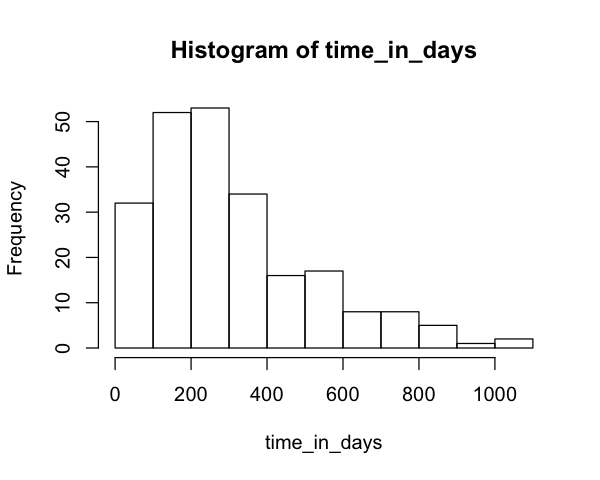

In [50]:
time_in_days = survival::lung[,2]
hist(time_in_days)

There are also datasets "embedded" in R that are easy to use as well.  

To load a list of all R data packages:

In [51]:
data()

Let's try one:

In [52]:
data("ChickWeight") # loads a particular dataset

Get more info:

In [53]:
help("ChickWeight") # displays more info about a package in help window

Or, if that is too confusing, we just look at the data:

In [58]:
head(ChickWeight)

weight,Time,Chick,Diet
42,0,1,1
51,2,1,1
59,4,1,1
64,6,1,1
76,8,1,1
93,10,1,1


So, this shows the weight of a baby chicken on different diets.

Note that there are some examples on the "help" page.  We can run these with:

In [55]:
example(ChickWeight)


ChckWg> ## No test: 
ChckWg> ##D require(graphics)
ChckWg> ##D coplot(weight ~ Time | Chick, data = ChickWeight,
ChckWg> ##D        type = "b", show.given = FALSE)
ChckWg> ## End(No test)
ChckWg> 
ChckWg> 


This may not work in a jupyter notebook, so don't worry about that right now if no plots show up.

Also, don't worry if the plots are confusing!  We'll talk more about them later in the course.